In [2]:
import pandas as pd
import sys
import os
import warnings
warnings.filterwarnings('ignore')
sys.path.append('../scripts')
from data_loader import *
from credit_score import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
# path to the CSV file
filename1 = 'featured_df.parquet'
#filename2 = 'final_credit_df.parquet'

path1 = os.path.join('..', 'data/featured', filename1)
#path2 = os.path.join('..', 'data/featured', filename2)

# Load dataset
credit_score_df = load_data(path1)
# credit_card_data = load_data(path2)

## Data

In [4]:
credit_score_df

,Recency_binned_WoE,Frequency_binned_WoE,Monetary_binned_WoE,MeanAmount_binned_WoE,StdAmount_binned_WoE,AvgTransactionHour_binned_WoE,AvgTransactionDay_binned_WoE,AvgTransactionMonth_binned_WoE,is_high_risk
2,0.000000,0.000000,0.000000,-0.509194,0.166758,0.709094,-0.965636,0.061430,1
3,-0.216590,0.403894,0.000000,2.118931,2.323540,-0.371244,-0.965636,0.061430,1
4,-0.653109,0.000000,0.000000,-0.236934,-0.876021,-0.371244,1.186864,-0.256322,1
6,0.000000,0.403894,-1.511833,-0.320833,-0.876021,-0.444097,1.233701,3.608701,1
9,0.000000,0.000000,0.000000,-0.320833,2.323540,-0.466906,1.186864,3.608701,1
...,...,...,...,...,...,...,...,...,...
3718,-1.522281,0.000000,0.000000,-0.236934,-0.876021,-0.444097,1.186864,-0.256322,1
3719,-0.216590,0.000000,0.000000,-0.509194,0.166758,-0.371244,-0.257717,0.502589,1
3720,-1.522281,-2.461131,-1.836349,-0.320833,-0.555657,-0.371244,-0.257717,-1.574754,0
3721,0.000000,-1.068884,-1.836349,-0.320833,-0.876021,-0.371244,1.186864,3.608701,1


In [5]:
df = credit_score_df.sample(frac=1).reset_index(drop=True)

In [6]:
df

,Recency_binned_WoE,Frequency_binned_WoE,Monetary_binned_WoE,MeanAmount_binned_WoE,StdAmount_binned_WoE,AvgTransactionHour_binned_WoE,AvgTransactionDay_binned_WoE,AvgTransactionMonth_binned_WoE,is_high_risk
0,-0.216590,0.403894,0.000000,2.118931,2.323540,0.927543,-0.410532,-1.574754,1
1,0.000000,0.000000,0.414863,-0.320833,-0.555657,-0.371244,-0.965636,3.608701,1
2,-0.216590,0.000000,0.000000,-0.109157,2.323540,-0.466906,1.233701,0.502589,1
3,0.000000,-2.461131,0.414863,-0.109157,0.115417,-0.371244,-0.410532,3.608701,1
4,-1.522281,0.000000,0.000000,2.118931,0.115417,0.709094,-0.410532,-0.256322,1
...,...,...,...,...,...,...,...,...,...
3016,-0.653109,0.403894,0.000000,2.118931,2.323540,-0.444097,1.233701,0.502589,1
3017,0.000000,0.000000,0.000000,2.118931,0.115417,-0.371244,1.186864,3.608701,1
3018,-1.522281,-2.461131,-1.836349,-0.320833,-0.555657,-0.371244,-0.257717,-1.574754,0
3019,-1.522281,-1.068884,0.414863,-0.109157,-0.876021,-0.466906,-0.410532,-1.574754,1


# Model 1:

### Model that assigns risk probability for a new customer

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

In [8]:
X = df.drop('is_high_risk', axis=1)
y = df['is_high_risk']

# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training the logistic regression model

In [9]:
lr_model = LogisticRegression(C=1.0, penalty='l2', random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Model Evalution

In [10]:
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

Accuracy: 0.92
Precision: 0.91
Recall: 0.97
F1-score: 0.94
ROC-AUC: 0.89


### Plot the ROC-AUC curve

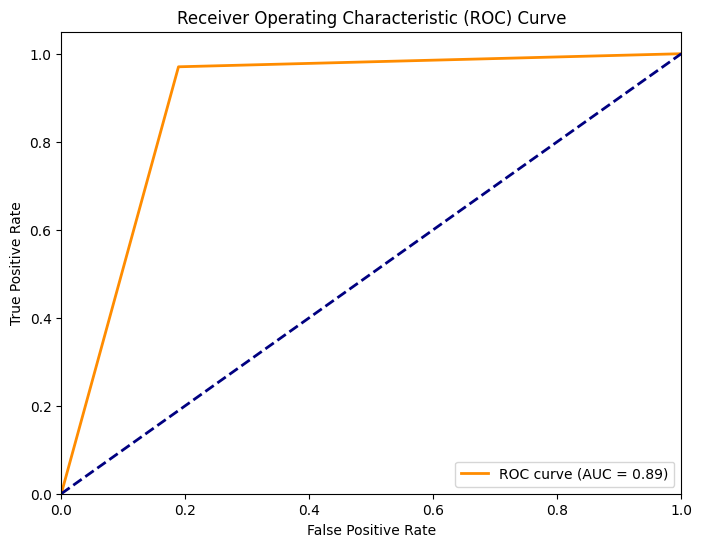

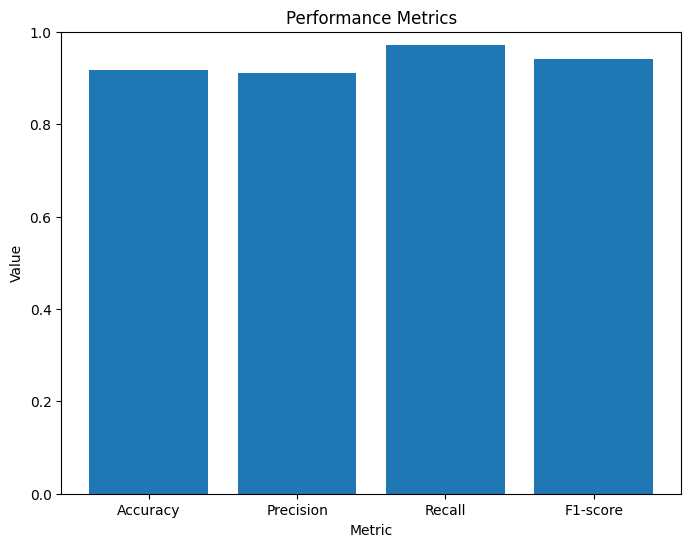

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot the other performance metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(labels, values)
plt.ylim([0, 1])
plt.title('Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

### Save  model 

In [19]:
import os
import joblib

model_dir = '../models'
model_path = os.path.join(model_dir, 'risk_prob_lr_model.pkl')

os.makedirs(model_dir, exist_ok=True)

try:
    joblib.dump(lr_model, model_path)
    print(f"Model saved to {model_path}")
except Exception as e:
    print(f"An error occurred while saving the model: {e}")

Model saved to ../models\risk_prob_lr_model.pkl


## Model 2

### Model that assigns credit score from risk probability estimates

In [ ]:
assessment_model.fit(X_train, y_train)

## Model Evaluation

In [ ]:
# Evaluate the model on the testing set
test_accuracy = accuracy_score(y_test, assessment_model.predict(X_test))
test_precision = precision_score(y_test, assessment_model.predict(X_test))
test_recall = recall_score(y_test, assessment_model.predict(X_test))
test_f1 = f1_score(y_test, assessment_model.predict(X_test))

print("Testing Accuracy:", test_accuracy)
print("Testing Precision:", test_precision)
print("Testing Recall:", test_recall)
print("Testing F1-score:", test_f1)

## Test

In [ ]:
y_pred = assessment_model.predict(X_test)

In [ ]:
y_pred

# Model 2 - model that assigns credit score from risk probability estimates


In [ ]:
# path to the CSV file
filename = 'processed_model_input.parquet'
path = os.path.join('..', 'data/model_input', filename)

# Load dataset
featured_df = load_data(path)
featured_df.head()

## Calculate credit score

In [ ]:
credit_df = calculate_credit_score(featured_df)
credit_df.head()

In [ ]:
# Split the data into features and target
X = credit_df[['RFMS_Score', 'RFMS_bin_woe']]
y = credit_df['fico_credit_score']

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
    
 # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the RandomForestRegressor model on the test set
y_pred = model.predict(X_test)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Root Mean Squared Error (RMSE)
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse:.2f}")

# R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2:.2f}")

In [ ]:
import pandas as pd

# Create a DataFrame with the real and predicted values
results = pd.DataFrame({
    'Real_Value': y_test,
    'Predicted_Value': y_pred
})

# Display the first few rows of the DataFrame
print(results.head())